# **P4DS Final Project: An Analysis On Global Warming**
Huy G. Tong $^{1 *}$ \
$^{1}$ *Faculty of Information Technology, VNUHCM - University of Science, Vietnam*\
$^{*}$ *Student ID: 21127307*


#### **ABSTRACT**
To be written later. dear Huy, remember to reformat the markdown later

#### **1. INTRODUCTION**

To be written later.

#### **2. METHOD**

In this section, I will describe in detail the steps used to perform the analysis on the dataset. I will also give a brief description of the data used in this project, as well as include the codes to help derive insightful information.

First, let us import the necessary packages, be sure to run the bellow cell at least once when executing this Notebook.


In [41]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime as dt

#### **2.1 Data**

In [42]:
globtemp = pd.read_csv("data/GlobalTemperatures.csv")
country_surftemp = pd.read_csv("data/GlobalLandTemperaturesByCountry.csv")
country_co2_emission = pd.read_csv("data/co2_emissions_kt_by_country.csv")

#### **2.2 Preprocessing**

In [43]:
# globtemp = globtemp.dropna(axis=0)
# country_surftemp = country_surftemp.dropna(axis=0)
# country_co2_emission = country_co2_emission.dropna(axis=0)

In [44]:
globtemp_annual = globtemp.copy()
globtemp_annual["dt"] = pd.to_datetime(globtemp_annual["dt"], format="%Y-%m-%d").dt.year
globtemp_annual = globtemp_annual[["dt", "LandAverageTemperature", "LandAverageTemperatureUncertainty"]]
globtemp_annual = globtemp_annual.groupby("dt").mean().reset_index()
globtemp_annual.sample(3)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty
64,1814,7.591750,2.168500
78,1828,8.165333,1.648417
119,1869,8.432083,0.595667


In [45]:
country_surftemp["dt"] = pd.to_datetime(country_surftemp["dt"], format="%Y-%m-%d")
country_surftemp.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe
577461,2013-09-01,NaN,NaN,Zimbabwe


In [46]:
country_co2_emission["year"] = pd.to_datetime(country_co2_emission["year"], format="%Y").dt.year
co2_emission_annual = country_co2_emission[["year", "value"]]
co2_emission_annual = co2_emission_annual.groupby("year").mean().reset_index()
co2_emission_annual.sample(3)

,year,value
56,2016,1.210105e+06
27,1987,9.050293e+05
4,1964,4.117655e+05


#### **2.3 Analysis**

note questions:
- how has the global temperature changed throughout the years?
- temp and gas: what is the relation?

#### **2.3.1 Global surface temperature trend**

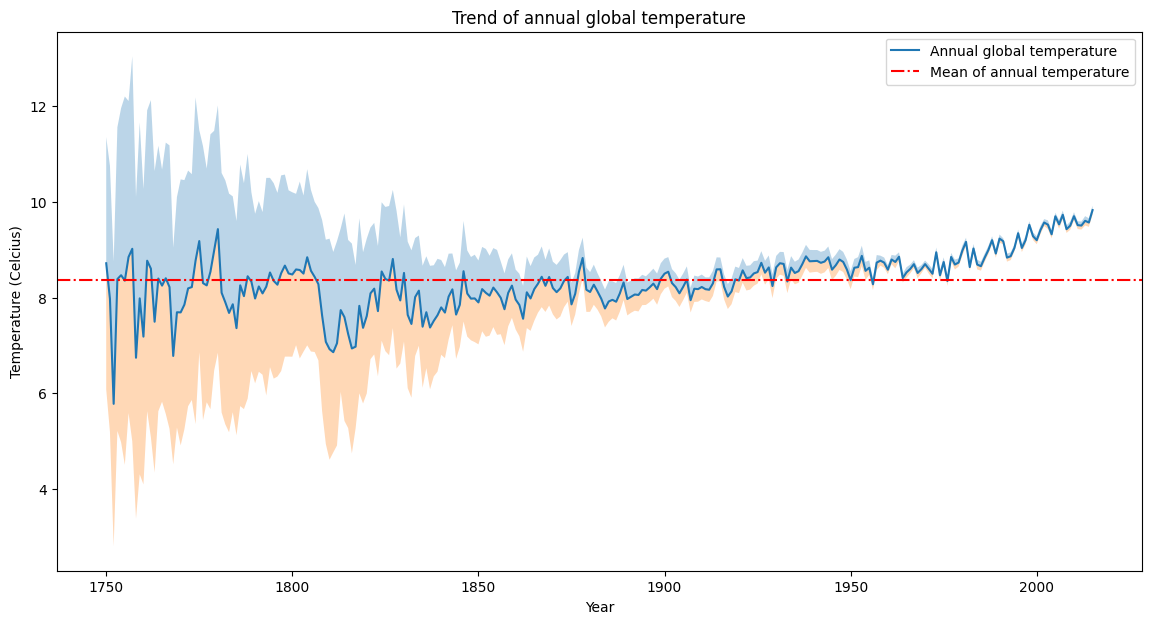

In [47]:
# Plot the annual temperature

years = globtemp_annual["dt"]

annual_avg = globtemp_annual["LandAverageTemperature"]
annual_uncertainty = globtemp_annual["LandAverageTemperatureUncertainty"]

plt.plot(years, annual_avg, label="Annual global temperature")
plt.fill_between(years, annual_avg, annual_avg + annual_uncertainty, alpha=0.3)
plt.fill_between(years, annual_avg, annual_avg - annual_uncertainty, alpha=0.3)

plt.axhline(annual_avg.mean(), color="red", linestyle="-.", label="Mean of annual temperature")

plt.xlabel("Year")
plt.ylabel("Temperature (Celcius)")
plt.title("Trend of annual global temperature")
plt.legend()

fig = plt.gcf()
fig.set_size_inches((14, 7))

plt.show()

look at the monthly data of 2 different years from a sample of countries \
select the years first

In [48]:
year_min, year_max = 1900, 2000

country_surftemp = country_surftemp.loc[
    (country_surftemp["dt"].dt.year >= year_min)
    & (country_surftemp["dt"].dt.year <= year_max)
]

select a few countries to look at and preprocess for plot

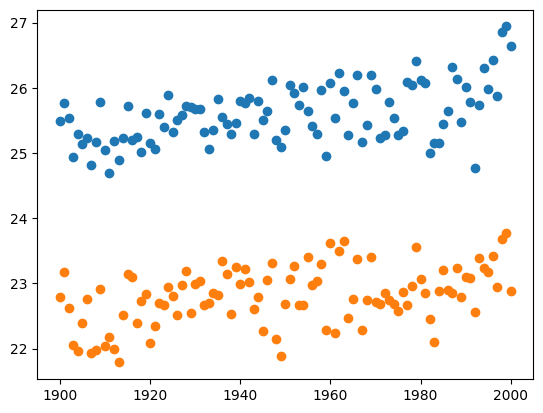

In [58]:
countries = ["Saudi Arabia", "Egypt"]

for country in countries:

    # Extract the rows of 1 country and retain the year and average temp
    nation_annual_temp = country_surftemp.loc[country_surftemp["Country"] == country]
    nation_annual_temp = nation_annual_temp[["dt", "AverageTemperature"]]

    nation_annual_temp["dt"] = nation_annual_temp["dt"].dt.year
    nation_annual_temp = nation_annual_temp.groupby("dt").mean().reset_index()

    plt.scatter(nation_annual_temp["dt"], nation_annual_temp["AverageTemperature"])



#### **2.3.2. Global warming: temperature and greenhouse gas**

sync 2 datasets

In [50]:
globtemp_year_min = globtemp_annual["dt"].min()
globtemp_year_max = globtemp_annual["dt"].max()

co2_emission_year_min = co2_emission_annual["year"].min()
co2_emission_year_max = co2_emission_annual["year"].max()

start_year = max(globtemp_year_min, co2_emission_year_min)
end_year = min(globtemp_year_max, co2_emission_year_max)

globtemp_matched = globtemp_annual.loc[
    (globtemp_annual["dt"] >= start_year) 
    & (globtemp_annual["dt"] <= end_year)
]

co2_emission_matched = co2_emission_annual.loc[
    (co2_emission_annual["year"] >= start_year) 
    & (co2_emission_annual["year"] <= end_year)
]

print(f"-- Matched data from year {start_year} to {end_year}")
print(f"-- Total of {end_year - start_year + 1} years")

-- Matched data from year 1960 to 2015
-- Total of 56 years


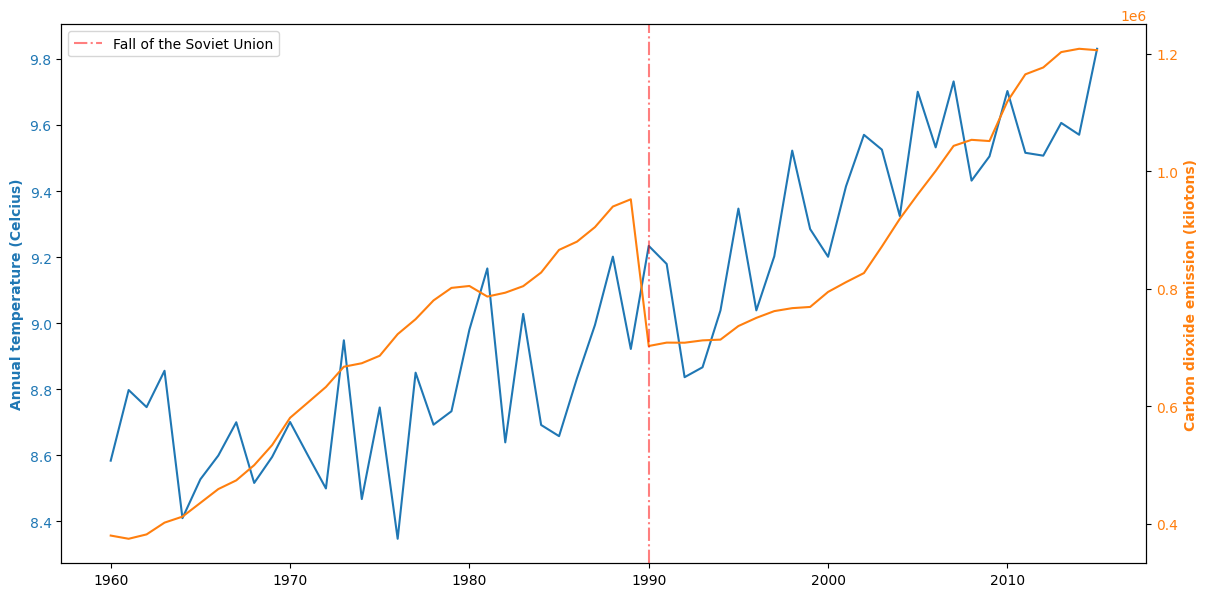

In [51]:
matched_years = np.arange(start_year, end_year + 1)

fig, ax_temp = plt.subplots()

ax_temp.plot(matched_years, globtemp_matched["LandAverageTemperature"], color="tab:blue")
ax_temp.set_ylabel("Annual temperature (Celcius)", color="tab:blue", fontweight="bold")
ax_temp.tick_params(axis='y', labelcolor="tab:blue")

ax_co2 = ax_temp.twinx()
ax_co2.plot(matched_years, co2_emission_matched["value"], color="tab:orange")
ax_co2.set_ylabel("Carbon dioxide emission (kilotons)", color="tab:orange", fontweight="bold")
ax_co2.tick_params(axis='y', labelcolor="tab:orange")

plt.axvline(1990, color="red", alpha=0.5, linestyle="-.", label="Fall of the Soviet Union")

plt.legend()

fig = plt.gcf()
fig.set_size_inches((14, 7))

plt.show()

#### **3. CONCLUSION**

#### **REFERENCES**